In [ ]:
!pip install pyarrow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_parquet('train.parquet',engine = 'pyarrow')
data

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1
...,...,...,...
29080886,a0ee9f75-1c7c-11ec-94c7-16262ee38c7f,2018-07-06,DRUG_TYPE_6
29080897,a0ee1284-1c7c-11ec-a3d5-16262ee38c7f,2017-12-29,DRUG_TYPE_6
29080900,a0ee9b26-1c7c-11ec-8a40-16262ee38c7f,2018-10-18,DRUG_TYPE_10
29080903,a0ee1a92-1c7c-11ec-8341-16262ee38c7f,2015-09-18,DRUG_TYPE_6


In [ ]:
data['Patient-Uid'].value_counts()

a0ddfd2c-1c7c-11ec-876d-16262ee38c7f    1645
a0ea618f-1c7c-11ec-93fb-16262ee38c7f    1320
a0e553c4-1c7c-11ec-83f1-16262ee38c7f    1163
a0df4809-1c7c-11ec-be0b-16262ee38c7f    1099
a0ec2afe-1c7c-11ec-befd-16262ee38c7f    1075
                                        ... 
a0ecc127-1c7c-11ec-92b5-16262ee38c7f      31
a0eb794b-1c7c-11ec-92d7-16262ee38c7f      30
a0f02cd8-1c7c-11ec-96a0-16262ee38c7f      28
a0efac48-1c7c-11ec-9daa-16262ee38c7f      25
a0f0d0b5-1c7c-11ec-9901-16262ee38c7f      24
Name: Patient-Uid, Length: 27033, dtype: int64

In [ ]:
data['Date'].value_counts()

2019-05-21    3678
2019-05-22    3387
2019-03-05    3198
2019-05-14    3169
2019-03-12    3034
              ... 
2018-02-28     312
2017-02-28     286
2020-02-29     285
2016-01-29     273
2016-02-29     259
Name: Date, Length: 1977, dtype: int64

In [ ]:
data['Incident'].value_counts()

DRUG_TYPE_6          561934
DRUG_TYPE_1          484666
PRIMARY_DIAGNOSIS    431902
DRUG_TYPE_0          300005
DRUG_TYPE_7          258782
DRUG_TYPE_2          256841
DRUG_TYPE_8          160066
DRUG_TYPE_3          127676
TEST_TYPE_1           96810
TARGET DRUG           67218
DRUG_TYPE_9           66894
DRUG_TYPE_5           57510
DRUG_TYPE_11          48118
SYMPTOM_TYPE_0        46078
SYMPTOM_TYPE_6        32066
TEST_TYPE_0           27570
SYMPTOM_TYPE_7        22019
DRUG_TYPE_10          20925
DRUG_TYPE_14          17306
DRUG_TYPE_13          12372
DRUG_TYPE_12           9551
SYMPTOM_TYPE_14        8927
SYMPTOM_TYPE_1         8608
SYMPTOM_TYPE_2         8168
TEST_TYPE_3            8115
SYMPTOM_TYPE_5         7583
SYMPTOM_TYPE_8         7430
TEST_TYPE_2            7021
SYMPTOM_TYPE_15        6295
SYMPTOM_TYPE_10        6005
SYMPTOM_TYPE_29        5950
SYMPTOM_TYPE_16        4940
DRUG_TYPE_15           4906
SYMPTOM_TYPE_9         4885
DRUG_TYPE_4            4566
SYMPTOM_TYPE_4      

In [ ]:
a = data['Incident'].unique()

In [ ]:
data['Incident'].unique().size

57

# TAKING ONE UNIQUE PATIENT UID FOR PREPROCESSING

In [ ]:
patient = data.loc[data['Patient-Uid']=='a0ecc127-1c7c-11ec-92b5-16262ee38c7f']
patient

,Patient-Uid,Date,Incident
68120,a0ecc127-1c7c-11ec-92b5-16262ee38c7f,2018-12-21,PRIMARY_DIAGNOSIS
269539,a0ecc127-1c7c-11ec-92b5-16262ee38c7f,2017-10-06,SYMPTOM_TYPE_6
356998,a0ecc127-1c7c-11ec-92b5-16262ee38c7f,2018-12-15,PRIMARY_DIAGNOSIS
383090,a0ecc127-1c7c-11ec-92b5-16262ee38c7f,2018-05-23,PRIMARY_DIAGNOSIS
383447,a0ecc127-1c7c-11ec-92b5-16262ee38c7f,2017-05-20,PRIMARY_DIAGNOSIS
537712,a0ecc127-1c7c-11ec-92b5-16262ee38c7f,2018-10-26,PRIMARY_DIAGNOSIS
662239,a0ecc127-1c7c-11ec-92b5-16262ee38c7f,2016-05-19,PRIMARY_DIAGNOSIS
662343,a0ecc127-1c7c-11ec-92b5-16262ee38c7f,2018-04-11,PRIMARY_DIAGNOSIS
662931,a0ecc127-1c7c-11ec-92b5-16262ee38c7f,2019-02-15,PRIMARY_DIAGNOSIS
718347,a0ecc127-1c7c-11ec-92b5-16262ee38c7f,2016-10-08,PRIMARY_DIAGNOSIS


In [ ]:
patient['Date'] = pd.to_datetime(patient['Date'])

<ipython-input-10-9ef39e94d14f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient['Date'] = pd.to_datetime(patient['Date'])


In [ ]:
patient = patient.sort_values(by = 'Date')
patient

,Patient-Uid,Date,Incident
24653924,a0ecc127-1c7c-11ec-92b5-16262ee38c7f,2015-04-15,DRUG_TYPE_6
662239,a0ecc127-1c7c-11ec-92b5-16262ee38c7f,2016-05-19,PRIMARY_DIAGNOSIS
12846485,a0ecc127-1c7c-11ec-92b5-16262ee38c7f,2016-10-08,TEST_TYPE_4
718347,a0ecc127-1c7c-11ec-92b5-16262ee38c7f,2016-10-08,PRIMARY_DIAGNOSIS
11842834,a0ecc127-1c7c-11ec-92b5-16262ee38c7f,2017-02-11,TEST_TYPE_4
2388927,a0ecc127-1c7c-11ec-92b5-16262ee38c7f,2017-02-11,PRIMARY_DIAGNOSIS
383447,a0ecc127-1c7c-11ec-92b5-16262ee38c7f,2017-05-20,PRIMARY_DIAGNOSIS
16978184,a0ecc127-1c7c-11ec-92b5-16262ee38c7f,2017-09-01,TEST_TYPE_4
4012665,a0ecc127-1c7c-11ec-92b5-16262ee38c7f,2017-09-01,SYMPTOM_TYPE_6
269539,a0ecc127-1c7c-11ec-92b5-16262ee38c7f,2017-10-06,SYMPTOM_TYPE_6


In [ ]:
data['Incident'].unique()

array(['PRIMARY_DIAGNOSIS', 'SYMPTOM_TYPE_0', 'DRUG_TYPE_0',
       'DRUG_TYPE_1', 'DRUG_TYPE_2', 'TEST_TYPE_0', 'DRUG_TYPE_3',
       'DRUG_TYPE_4', 'DRUG_TYPE_5', 'DRUG_TYPE_6', 'DRUG_TYPE_8',
       'DRUG_TYPE_7', 'SYMPTOM_TYPE_1', 'DRUG_TYPE_10', 'SYMPTOM_TYPE_29',
       'SYMPTOM_TYPE_2', 'DRUG_TYPE_11', 'DRUG_TYPE_9', 'DRUG_TYPE_13',
       'SYMPTOM_TYPE_5', 'TEST_TYPE_1', 'SYMPTOM_TYPE_6', 'TEST_TYPE_2',
       'SYMPTOM_TYPE_3', 'SYMPTOM_TYPE_8', 'DRUG_TYPE_14', 'DRUG_TYPE_12',
       'SYMPTOM_TYPE_9', 'SYMPTOM_TYPE_10', 'SYMPTOM_TYPE_7',
       'SYMPTOM_TYPE_11', 'TEST_TYPE_3', 'DRUG_TYPE_15', 'SYMPTOM_TYPE_4',
       'SYMPTOM_TYPE_14', 'SYMPTOM_TYPE_13', 'SYMPTOM_TYPE_16',
       'SYMPTOM_TYPE_17', 'SYMPTOM_TYPE_15', 'SYMPTOM_TYPE_18',
       'SYMPTOM_TYPE_12', 'SYMPTOM_TYPE_20', 'SYMPTOM_TYPE_21',
       'DRUG_TYPE_17', 'SYMPTOM_TYPE_22', 'TEST_TYPE_4',
       'SYMPTOM_TYPE_23', 'DRUG_TYPE_16', 'TEST_TYPE_5',
       'SYMPTOM_TYPE_19', 'SYMPTOM_TYPE_24', 'SYMPTOM_TYPE_25',
   

In [ ]:
patient['Incident'] = patient['Incident'].replace(['PRIMARY_DIAGNOSIS', 'SYMPTOM_TYPE_0', 'DRUG_TYPE_0',
       'DRUG_TYPE_1', 'DRUG_TYPE_2', 'TEST_TYPE_0', 'DRUG_TYPE_3',
       'DRUG_TYPE_4', 'DRUG_TYPE_5', 'DRUG_TYPE_6', 'DRUG_TYPE_8',
       'DRUG_TYPE_7', 'SYMPTOM_TYPE_1', 'DRUG_TYPE_10', 'SYMPTOM_TYPE_29',
       'SYMPTOM_TYPE_2', 'DRUG_TYPE_11', 'DRUG_TYPE_9', 'DRUG_TYPE_13',
       'SYMPTOM_TYPE_5', 'TEST_TYPE_1', 'SYMPTOM_TYPE_6', 'TEST_TYPE_2',
       'SYMPTOM_TYPE_3', 'SYMPTOM_TYPE_8', 'DRUG_TYPE_14', 'DRUG_TYPE_12',
       'SYMPTOM_TYPE_9', 'SYMPTOM_TYPE_10', 'SYMPTOM_TYPE_7',
       'SYMPTOM_TYPE_11', 'TEST_TYPE_3', 'DRUG_TYPE_15', 'SYMPTOM_TYPE_4',
       'SYMPTOM_TYPE_14', 'SYMPTOM_TYPE_13', 'SYMPTOM_TYPE_16',
       'SYMPTOM_TYPE_17', 'SYMPTOM_TYPE_15', 'SYMPTOM_TYPE_18',
       'SYMPTOM_TYPE_12', 'SYMPTOM_TYPE_20', 'SYMPTOM_TYPE_21',
       'DRUG_TYPE_17', 'SYMPTOM_TYPE_22', 'TEST_TYPE_4',
       'SYMPTOM_TYPE_23', 'DRUG_TYPE_16', 'TEST_TYPE_5',
       'SYMPTOM_TYPE_19', 'SYMPTOM_TYPE_24', 'SYMPTOM_TYPE_25',
       'SYMPTOM_TYPE_26', 'SYMPTOM_TYPE_27', 'DRUG_TYPE_18',
       'SYMPTOM_TYPE_28'], 'NO TARGET DRUG')

In [ ]:
patient

,Patient-Uid,Date,Incident
24653924,a0ecc127-1c7c-11ec-92b5-16262ee38c7f,2015-04-15,NO TARGET DRUG
662239,a0ecc127-1c7c-11ec-92b5-16262ee38c7f,2016-05-19,NO TARGET DRUG
12846485,a0ecc127-1c7c-11ec-92b5-16262ee38c7f,2016-10-08,NO TARGET DRUG
718347,a0ecc127-1c7c-11ec-92b5-16262ee38c7f,2016-10-08,NO TARGET DRUG
11842834,a0ecc127-1c7c-11ec-92b5-16262ee38c7f,2017-02-11,NO TARGET DRUG
2388927,a0ecc127-1c7c-11ec-92b5-16262ee38c7f,2017-02-11,NO TARGET DRUG
383447,a0ecc127-1c7c-11ec-92b5-16262ee38c7f,2017-05-20,NO TARGET DRUG
16978184,a0ecc127-1c7c-11ec-92b5-16262ee38c7f,2017-09-01,NO TARGET DRUG
4012665,a0ecc127-1c7c-11ec-92b5-16262ee38c7f,2017-09-01,NO TARGET DRUG
269539,a0ecc127-1c7c-11ec-92b5-16262ee38c7f,2017-10-06,NO TARGET DRUG


In [ ]:
patient = patient.sort_values('Incident')
patient

,Patient-Uid,Date,Incident
24653924,a0ecc127-1c7c-11ec-92b5-16262ee38c7f,2015-04-15,NO TARGET DRUG
662931,a0ecc127-1c7c-11ec-92b5-16262ee38c7f,2019-02-15,NO TARGET DRUG
68120,a0ecc127-1c7c-11ec-92b5-16262ee38c7f,2018-12-21,NO TARGET DRUG
356998,a0ecc127-1c7c-11ec-92b5-16262ee38c7f,2018-12-15,NO TARGET DRUG
537712,a0ecc127-1c7c-11ec-92b5-16262ee38c7f,2018-10-26,NO TARGET DRUG
1270631,a0ecc127-1c7c-11ec-92b5-16262ee38c7f,2018-08-31,NO TARGET DRUG
1440996,a0ecc127-1c7c-11ec-92b5-16262ee38c7f,2018-08-08,NO TARGET DRUG
1271187,a0ecc127-1c7c-11ec-92b5-16262ee38c7f,2018-07-06,NO TARGET DRUG
1441430,a0ecc127-1c7c-11ec-92b5-16262ee38c7f,2019-12-14,NO TARGET DRUG
383090,a0ecc127-1c7c-11ec-92b5-16262ee38c7f,2018-05-23,NO TARGET DRUG


In [ ]:
p = patient.drop_duplicates(subset = ['Patient-Uid','Incident'],keep = 'last')
p

,Patient-Uid,Date,Incident
4718548,a0ecc127-1c7c-11ec-92b5-16262ee38c7f,2020-06-24,NO TARGET DRUG
18787700,a0ecc127-1c7c-11ec-92b5-16262ee38c7f,2019-02-15,TARGET DRUG


In [ ]:
p2 = p.drop_duplicates(subset = ['Patient-Uid'],keep = 'last')
p2

,Patient-Uid,Date,Incident
18787700,a0ecc127-1c7c-11ec-92b5-16262ee38c7f,2019-02-15,TARGET DRUG


FOR ADDING POSITIVE AND NEGATIVE SET (TARGET VARIABLE), CONDITION IS GIVEN

In [ ]:
from datetime import datetime as dt


In [ ]:
date = dt.now()

print(date)

2023-05-22 06:54:09.963294


In [ ]:
d1 = p2['Date']
d = date-pd.to_timedelta(30,unit = 'D')
print(d1)
print(d)
d > d1

18787700   2019-02-15
Name: Date, dtype: datetime64[ns]
2023-04-22 06:54:09.963294


18787700    True
Name: Date, dtype: bool

In [ ]:
s = []
for i, j in zip(p2['Incident'],p2['Date']):
  if i == 'TARGET DRUG' and date > (j-pd.to_timedelta(30,unit = "D")):
    s.append(1)
  else:
    s.append(0)

s

[1]

In [ ]:
p2['y'] = s
p2

<ipython-input-22-7301b3c66651>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p2['y'] = s


,Patient-Uid,Date,Incident,y
18787700,a0ecc127-1c7c-11ec-92b5-16262ee38c7f,2019-02-15,TARGET DRUG,1


APPLIED TO WHOLE DATAFRAME

In [ ]:
# Converting date column as datetime datatype to enable sorting
data['Date'] = pd.to_datetime(data['Date'])

data = data.sort_values(by = 'Date')
data

,Patient-Uid,Date,Incident
2438413,a0e7ebeb-1c7c-11ec-8c7f-16262ee38c7f,2015-04-07,DRUG_TYPE_2
2533766,a0e06816-1c7c-11ec-b99c-16262ee38c7f,2015-04-07,TEST_TYPE_1
2182546,a0df76af-1c7c-11ec-a317-16262ee38c7f,2015-04-07,DRUG_TYPE_2
2535444,a0e5d11e-1c7c-11ec-b4fa-16262ee38c7f,2015-04-07,DRUG_TYPE_6
2181968,a0e780cc-1c7c-11ec-96a1-16262ee38c7f,2015-04-07,DRUG_TYPE_6
...,...,...,...
919163,a0eacf22-1c7c-11ec-b9d1-16262ee38c7f,2020-09-03,PRIMARY_DIAGNOSIS
1623717,a0e4a00a-1c7c-11ec-aca4-16262ee38c7f,2020-09-03,DRUG_TYPE_1
3136869,a0e6cac9-1c7c-11ec-b9f5-16262ee38c7f,2020-09-03,DRUG_TYPE_8
17673668,a0ee901a-1c7c-11ec-880c-16262ee38c7f,2020-09-03,DRUG_TYPE_1


In [ ]:
data['Incident'] = data['Incident'].replace(['PRIMARY_DIAGNOSIS', 'SYMPTOM_TYPE_0', 'DRUG_TYPE_0',
       'DRUG_TYPE_1', 'DRUG_TYPE_2', 'TEST_TYPE_0', 'DRUG_TYPE_3',
       'DRUG_TYPE_4', 'DRUG_TYPE_5', 'DRUG_TYPE_6', 'DRUG_TYPE_8',
       'DRUG_TYPE_7', 'SYMPTOM_TYPE_1', 'DRUG_TYPE_10', 'SYMPTOM_TYPE_29',
       'SYMPTOM_TYPE_2', 'DRUG_TYPE_11', 'DRUG_TYPE_9', 'DRUG_TYPE_13',
       'SYMPTOM_TYPE_5', 'TEST_TYPE_1', 'SYMPTOM_TYPE_6', 'TEST_TYPE_2',
       'SYMPTOM_TYPE_3', 'SYMPTOM_TYPE_8', 'DRUG_TYPE_14', 'DRUG_TYPE_12',
       'SYMPTOM_TYPE_9', 'SYMPTOM_TYPE_10', 'SYMPTOM_TYPE_7',
       'SYMPTOM_TYPE_11', 'TEST_TYPE_3', 'DRUG_TYPE_15', 'SYMPTOM_TYPE_4',
       'SYMPTOM_TYPE_14', 'SYMPTOM_TYPE_13', 'SYMPTOM_TYPE_16',
       'SYMPTOM_TYPE_17', 'SYMPTOM_TYPE_15', 'SYMPTOM_TYPE_18',
       'SYMPTOM_TYPE_12', 'SYMPTOM_TYPE_20', 'SYMPTOM_TYPE_21',
       'DRUG_TYPE_17', 'SYMPTOM_TYPE_22', 'TEST_TYPE_4',
       'SYMPTOM_TYPE_23', 'DRUG_TYPE_16', 'TEST_TYPE_5',
       'SYMPTOM_TYPE_19', 'SYMPTOM_TYPE_24', 'SYMPTOM_TYPE_25',
       'SYMPTOM_TYPE_26', 'SYMPTOM_TYPE_27', 'DRUG_TYPE_18',
       'SYMPTOM_TYPE_28'], 'NO TARGET DRUG')
data

,Patient-Uid,Date,Incident
2438413,a0e7ebeb-1c7c-11ec-8c7f-16262ee38c7f,2015-04-07,NO TARGET DRUG
2533766,a0e06816-1c7c-11ec-b99c-16262ee38c7f,2015-04-07,NO TARGET DRUG
2182546,a0df76af-1c7c-11ec-a317-16262ee38c7f,2015-04-07,NO TARGET DRUG
2535444,a0e5d11e-1c7c-11ec-b4fa-16262ee38c7f,2015-04-07,NO TARGET DRUG
2181968,a0e780cc-1c7c-11ec-96a1-16262ee38c7f,2015-04-07,NO TARGET DRUG
...,...,...,...
919163,a0eacf22-1c7c-11ec-b9d1-16262ee38c7f,2020-09-03,NO TARGET DRUG
1623717,a0e4a00a-1c7c-11ec-aca4-16262ee38c7f,2020-09-03,NO TARGET DRUG
3136869,a0e6cac9-1c7c-11ec-b9f5-16262ee38c7f,2020-09-03,NO TARGET DRUG
17673668,a0ee901a-1c7c-11ec-880c-16262ee38c7f,2020-09-03,NO TARGET DRUG


In [ ]:
data = data.sort_values('Incident')
data

,Patient-Uid,Date,Incident
2438413,a0e7ebeb-1c7c-11ec-8c7f-16262ee38c7f,2015-04-07,NO TARGET DRUG
23625012,a0e9f1c1-1c7c-11ec-bcfb-16262ee38c7f,2019-01-04,NO TARGET DRUG
3088176,a0e5a34d-1c7c-11ec-8490-16262ee38c7f,2019-01-04,NO TARGET DRUG
2485150,a0e170cf-1c7c-11ec-9b5b-16262ee38c7f,2019-01-04,NO TARGET DRUG
28262640,a0ee6d8c-1c7c-11ec-bd1e-16262ee38c7f,2019-01-04,NO TARGET DRUG
...,...,...,...
12090921,a0ea6489-1c7c-11ec-94a2-16262ee38c7f,2018-09-13,TARGET DRUG
17477671,a0ef8b35-1c7c-11ec-9539-16262ee38c7f,2020-07-30,TARGET DRUG
23294808,a0f03f21-1c7c-11ec-bdf4-16262ee38c7f,2019-08-17,TARGET DRUG
17911432,a0ecad53-1c7c-11ec-b200-16262ee38c7f,2020-06-28,TARGET DRUG


In [ ]:
data_1= data.drop_duplicates(subset = ['Patient-Uid','Incident'],keep = 'last')
data_1

,Patient-Uid,Date,Incident
545625,a0def503-1c7c-11ec-b8ee-16262ee38c7f,2019-07-06,NO TARGET DRUG
13651393,a0ef8553-1c7c-11ec-b8a6-16262ee38c7f,2019-06-24,NO TARGET DRUG
1978572,a0e0d3a7-1c7c-11ec-b42d-16262ee38c7f,2019-12-14,NO TARGET DRUG
99755,a0dd2684-1c7c-11ec-a4ed-16262ee38c7f,2019-09-25,NO TARGET DRUG
20247681,a0efdd31-1c7c-11ec-8884-16262ee38c7f,2019-10-01,NO TARGET DRUG
...,...,...,...
12090921,a0ea6489-1c7c-11ec-94a2-16262ee38c7f,2018-09-13,TARGET DRUG
17477671,a0ef8b35-1c7c-11ec-9539-16262ee38c7f,2020-07-30,TARGET DRUG
23294808,a0f03f21-1c7c-11ec-bdf4-16262ee38c7f,2019-08-17,TARGET DRUG
17911432,a0ecad53-1c7c-11ec-b200-16262ee38c7f,2020-06-28,TARGET DRUG


In [ ]:
data1= data_1.drop_duplicates(subset = ['Patient-Uid'],keep = 'last')
data1

,Patient-Uid,Date,Incident
545625,a0def503-1c7c-11ec-b8ee-16262ee38c7f,2019-07-06,NO TARGET DRUG
1978572,a0e0d3a7-1c7c-11ec-b42d-16262ee38c7f,2019-12-14,NO TARGET DRUG
99755,a0dd2684-1c7c-11ec-a4ed-16262ee38c7f,2019-09-25,NO TARGET DRUG
692362,a0e98b8a-1c7c-11ec-9c89-16262ee38c7f,2019-10-01,NO TARGET DRUG
1985698,a0e2c310-1c7c-11ec-9ef1-16262ee38c7f,2019-09-20,NO TARGET DRUG
...,...,...,...
12090921,a0ea6489-1c7c-11ec-94a2-16262ee38c7f,2018-09-13,TARGET DRUG
17477671,a0ef8b35-1c7c-11ec-9539-16262ee38c7f,2020-07-30,TARGET DRUG
23294808,a0f03f21-1c7c-11ec-bdf4-16262ee38c7f,2019-08-17,TARGET DRUG
17911432,a0ecad53-1c7c-11ec-b200-16262ee38c7f,2020-06-28,TARGET DRUG


In [ ]:
y = []
for i, j in zip(data1['Incident'],data1['Date']):
  if i == 'TARGET DRUG' and date > (j-pd.to_timedelta(30,unit = "D")):
    y.append(1)
  else:
    y.append(0)

data1['y'] = y
data1

<ipython-input-28-9bdb15bfa129>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['y'] = y


,Patient-Uid,Date,Incident,y
545625,a0def503-1c7c-11ec-b8ee-16262ee38c7f,2019-07-06,NO TARGET DRUG,0
1978572,a0e0d3a7-1c7c-11ec-b42d-16262ee38c7f,2019-12-14,NO TARGET DRUG,0
99755,a0dd2684-1c7c-11ec-a4ed-16262ee38c7f,2019-09-25,NO TARGET DRUG,0
692362,a0e98b8a-1c7c-11ec-9c89-16262ee38c7f,2019-10-01,NO TARGET DRUG,0
1985698,a0e2c310-1c7c-11ec-9ef1-16262ee38c7f,2019-09-20,NO TARGET DRUG,0
...,...,...,...,...
12090921,a0ea6489-1c7c-11ec-94a2-16262ee38c7f,2018-09-13,TARGET DRUG,1
17477671,a0ef8b35-1c7c-11ec-9539-16262ee38c7f,2020-07-30,TARGET DRUG,1
23294808,a0f03f21-1c7c-11ec-bdf4-16262ee38c7f,2019-08-17,TARGET DRUG,1
17911432,a0ecad53-1c7c-11ec-b200-16262ee38c7f,2020-06-28,TARGET DRUG,1


In [ ]:
data1 = data1.sort_index()
data1

,Patient-Uid,Date,Incident,y
307,a0dcb0ec-1c7c-11ec-8314-16262ee38c7f,2017-06-23,NO TARGET DRUG,0
555,a0dcc544-1c7c-11ec-8154-16262ee38c7f,2016-12-07,NO TARGET DRUG,0
722,a0dcd29e-1c7c-11ec-b863-16262ee38c7f,2017-04-12,NO TARGET DRUG,0
831,a0dcc6f9-1c7c-11ec-b542-16262ee38c7f,2017-05-13,NO TARGET DRUG,0
1040,a0dce6fd-1c7c-11ec-8229-16262ee38c7f,2017-05-18,NO TARGET DRUG,0
...,...,...,...,...
29065006,a0ef021c-1c7c-11ec-a7dd-16262ee38c7f,2020-07-28,TARGET DRUG,1
29065251,a0eebc02-1c7c-11ec-af29-16262ee38c7f,2020-06-26,TARGET DRUG,1
29065919,a0f03d16-1c7c-11ec-bfff-16262ee38c7f,2019-09-26,TARGET DRUG,1
29067062,a0efc1fa-1c7c-11ec-9e1c-16262ee38c7f,2019-04-16,TARGET DRUG,1


In [ ]:
data1['Date_year'] = data1['Date'].dt.year
data1['Date_month'] = data1['Date'].dt.month
data1['Date_week'] = data1['Date'].dt.week
data1['Date_day'] = data1['Date'].dt.day
data1['Date_dayofweek'] = data1['Date'].dt.dayofweek

data1

<ipython-input-30-cd6699f4475b>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data1['Date_week'] = data1['Date'].dt.week


,Patient-Uid,Date,Incident,y,Date_year,Date_month,Date_week,Date_day,Date_dayofweek
307,a0dcb0ec-1c7c-11ec-8314-16262ee38c7f,2017-06-23,NO TARGET DRUG,0,2017,6,25,23,4
555,a0dcc544-1c7c-11ec-8154-16262ee38c7f,2016-12-07,NO TARGET DRUG,0,2016,12,49,7,2
722,a0dcd29e-1c7c-11ec-b863-16262ee38c7f,2017-04-12,NO TARGET DRUG,0,2017,4,15,12,2
831,a0dcc6f9-1c7c-11ec-b542-16262ee38c7f,2017-05-13,NO TARGET DRUG,0,2017,5,19,13,5
1040,a0dce6fd-1c7c-11ec-8229-16262ee38c7f,2017-05-18,NO TARGET DRUG,0,2017,5,20,18,3
...,...,...,...,...,...,...,...,...,...
29065006,a0ef021c-1c7c-11ec-a7dd-16262ee38c7f,2020-07-28,TARGET DRUG,1,2020,7,31,28,1
29065251,a0eebc02-1c7c-11ec-af29-16262ee38c7f,2020-06-26,TARGET DRUG,1,2020,6,26,26,4
29065919,a0f03d16-1c7c-11ec-bfff-16262ee38c7f,2019-09-26,TARGET DRUG,1,2019,9,39,26,3
29067062,a0efc1fa-1c7c-11ec-9e1c-16262ee38c7f,2019-04-16,TARGET DRUG,1,2019,4,16,16,1


In [ ]:
data2 = data1.drop(['Patient-Uid','Date'],axis = 1)
data2

,Incident,y,Date_year,Date_month,Date_week,Date_day,Date_dayofweek
307,NO TARGET DRUG,0,2017,6,25,23,4
555,NO TARGET DRUG,0,2016,12,49,7,2
722,NO TARGET DRUG,0,2017,4,15,12,2
831,NO TARGET DRUG,0,2017,5,19,13,5
1040,NO TARGET DRUG,0,2017,5,20,18,3
...,...,...,...,...,...,...,...
29065006,TARGET DRUG,1,2020,7,31,28,1
29065251,TARGET DRUG,1,2020,6,26,26,4
29065919,TARGET DRUG,1,2019,9,39,26,3
29067062,TARGET DRUG,1,2019,4,16,16,1


In [ ]:
data2 =data2.iloc[:,[0,2,3,4,5,6,1]]
data2

,Incident,Date_year,Date_month,Date_week,Date_day,Date_dayofweek,y
307,NO TARGET DRUG,2017,6,25,23,4,0
555,NO TARGET DRUG,2016,12,49,7,2,0
722,NO TARGET DRUG,2017,4,15,12,2,0
831,NO TARGET DRUG,2017,5,19,13,5,0
1040,NO TARGET DRUG,2017,5,20,18,3,0
...,...,...,...,...,...,...,...
29065006,TARGET DRUG,2020,7,31,28,1,1
29065251,TARGET DRUG,2020,6,26,26,4,1
29065919,TARGET DRUG,2019,9,39,26,3,1
29067062,TARGET DRUG,2019,4,16,16,1,1


# DATA PREPROCESSING (everything put together in one cell)

In [ ]:
#data preprocessing steps

# Converting date column as datetime datatype to enable sorting
data['Date'] = pd.to_datetime(data['Date'])

# Sorting dataframe  by date
data = data.sort_values(by = 'Date')

# Converting values  in Incident column other than TARGET DRUG as NO TARGET DRUG
data['Incident'] = data['Incident'].replace(['PRIMARY_DIAGNOSIS', 'SYMPTOM_TYPE_0', 'DRUG_TYPE_0',
       'DRUG_TYPE_1', 'DRUG_TYPE_2', 'TEST_TYPE_0', 'DRUG_TYPE_3',
       'DRUG_TYPE_4', 'DRUG_TYPE_5', 'DRUG_TYPE_6', 'DRUG_TYPE_8',
       'DRUG_TYPE_7', 'SYMPTOM_TYPE_1', 'DRUG_TYPE_10', 'SYMPTOM_TYPE_29',
       'SYMPTOM_TYPE_2', 'DRUG_TYPE_11', 'DRUG_TYPE_9', 'DRUG_TYPE_13',
       'SYMPTOM_TYPE_5', 'TEST_TYPE_1', 'SYMPTOM_TYPE_6', 'TEST_TYPE_2',
       'SYMPTOM_TYPE_3', 'SYMPTOM_TYPE_8', 'DRUG_TYPE_14', 'DRUG_TYPE_12',
       'SYMPTOM_TYPE_9', 'SYMPTOM_TYPE_10', 'SYMPTOM_TYPE_7',
       'SYMPTOM_TYPE_11', 'TEST_TYPE_3', 'DRUG_TYPE_15', 'SYMPTOM_TYPE_4',
       'SYMPTOM_TYPE_14', 'SYMPTOM_TYPE_13', 'SYMPTOM_TYPE_16',
       'SYMPTOM_TYPE_17', 'SYMPTOM_TYPE_15', 'SYMPTOM_TYPE_18',
       'SYMPTOM_TYPE_12', 'SYMPTOM_TYPE_20', 'SYMPTOM_TYPE_21',
       'DRUG_TYPE_17', 'SYMPTOM_TYPE_22', 'TEST_TYPE_4',
       'SYMPTOM_TYPE_23', 'DRUG_TYPE_16', 'TEST_TYPE_5',
       'SYMPTOM_TYPE_19', 'SYMPTOM_TYPE_24', 'SYMPTOM_TYPE_25',
       'SYMPTOM_TYPE_26', 'SYMPTOM_TYPE_27', 'DRUG_TYPE_18',
       'SYMPTOM_TYPE_28'], 'NO TARGET DRUG')


# Sorting dataframe according to values in Incident column to separate TARGET DRUG by alphabetical order
data = data.sort_values('Incident')

# Removing duplicate rows in dataframe from Patient Uid column such that 
# for TARGET DRUG there will be two rows for a unique patient uid and
# for NO TARGET DRUG there will be only one row for unique patient uid
data_1= data.drop_duplicates(subset = ['Patient-Uid','Incident'],keep = 'last')

# Removing duplicates in dataframe such that only one unique row is present for each unique patient
# where NO TARGET DRUG row will have been removed.
data1= data_1.drop_duplicates(subset = ['Patient-Uid'],keep = 'last')

# Sorting to match the original file.
data1 = data1.sort_index()

# Adding target vatriable in dataframe
# creating list
y = []

# using the given problem statemnet condition for 1 or 0
for i, j in zip(data1['Incident'],data1['Date']):
  if i == 'TARGET DRUG' and date > (j-pd.to_timedelta(30,unit = "D")):
    y.append(1)
  else:
    y.append(0)

# adding y to dataframe
data1['y'] = y

# adding year, month , week , day and day of week columns to datraframe using dt module.
data1['Date_year'] = data1['Date'].dt.year
data1['Date_month'] = data1['Date'].dt.month
data1['Date_week'] = data1['Date'].dt.week
data1['Date_day'] = data1['Date'].dt.day
data1['Date_dayofweek'] = data1['Date'].dt.dayofweek


# dropping patient uid and date column
data2 = data1.drop(['Patient-Uid','Date'],axis = 1)

#Rearranging the dataframe
data2 =data2.iloc[:,[0,2,3,4,5,6,1]]
data2








<ipython-input-33-5c7da29a9177>:61: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data1['Date_week'] = data1['Date'].dt.week


,Incident,Date_year,Date_month,Date_week,Date_day,Date_dayofweek,y
144,NO TARGET DRUG,2017,4,15,14,4,0
284,NO TARGET DRUG,2017,4,17,29,5,0
307,NO TARGET DRUG,2017,6,25,23,4,0
530,NO TARGET DRUG,2017,4,15,13,3,0
555,NO TARGET DRUG,2016,12,49,7,2,0
...,...,...,...,...,...,...,...
29065251,TARGET DRUG,2020,6,26,26,4,1
29065919,TARGET DRUG,2019,9,39,26,3,1
29067062,TARGET DRUG,2019,4,16,16,1,1
29074998,TARGET DRUG,2018,10,41,12,4,1


In [ ]:
data2.dtypes

Incident          object
Date_year          int64
Date_month         int64
Date_week          int64
Date_day           int64
Date_dayofweek     int64
y                  int64
dtype: object

In [ ]:
data2.Incident.unique()

array(['NO TARGET DRUG', 'TARGET DRUG'], dtype=object)

In [ ]:
data2.Incident = data2.Incident.map({'NO TARGET DRUG' : 0 , 'TARGET DRUG' : 1})

In [ ]:
data2.isnull().sum()

Incident          0
Date_year         0
Date_month        0
Date_week         0
Date_day          0
Date_dayofweek    0
y                 0
dtype: int64

# SPLITTING

In [ ]:
X = data2.loc[:,data2.columns[:6]]
X

,Incident,Date_year,Date_month,Date_week,Date_day,Date_dayofweek
144,0,2017,4,15,14,4
284,0,2017,4,17,29,5
307,0,2017,6,25,23,4
530,0,2017,4,15,13,3
555,0,2016,12,49,7,2
...,...,...,...,...,...,...
29065251,1,2020,6,26,26,4
29065919,1,2019,9,39,26,3
29067062,1,2019,4,16,16,1
29074998,1,2018,10,41,12,4


In [ ]:
y = data2.y
y

144         0
284         0
307         0
530         0
555         0
           ..
29065251    1
29065919    1
29067062    1
29074998    1
29075105    1
Name: y, Length: 27033, dtype: int64

Class 0: 17659
Class 1: 9374
Proportion of class 0 is  65.32 %


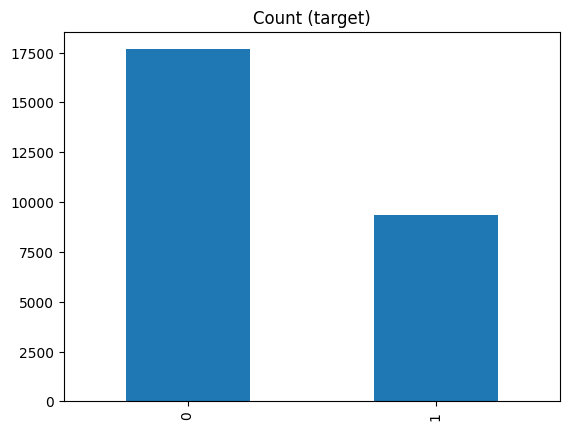

In [ ]:
target_count = data2.y.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')

target_count.plot(kind='bar', title='Count (target)');

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 8)

# BALANCING THE IMBALANCED DATA

In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Balancing using combination of SMOTE and Tomek Links

In [ ]:
from imblearn.combine import SMOTETomek

smtmk = SMOTETomek(sampling_strategy = 'minority')
X_smtmk , y_smtmk = smtmk.fit_resample(X_train,y_train)

Class 0: 14126
Class 1: 14126
Proportion of class 0 is  50.0 %


<Axes: title={'center': 'Count (target)'}>

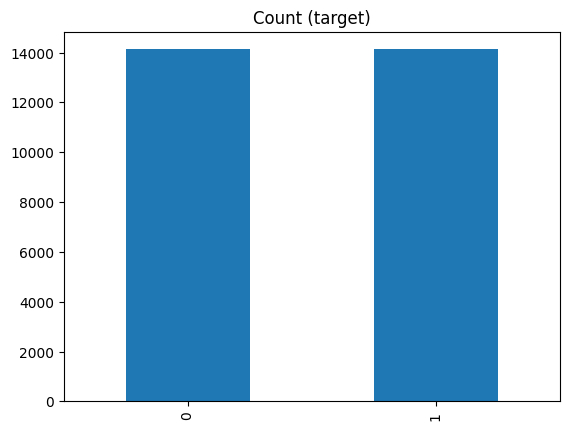

In [ ]:
target_count = y_smtmk.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')

target_count.plot(kind='bar', title='Count (target)')

 # MODELLING

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_smtmk,y_smtmk)
y_pred_dt = dt.predict(X_val)
y_pred_dt


array([0, 0, 1, ..., 0, 0, 0])

EVALUATING

In [ ]:
from sklearn.metrics import f1_score , roc_auc_score


f1_dt = f1_score(y_val,y_pred_dt)
f1_dt

1.0

In [ ]:
pred_probs_dt= dt.predict_proba(X_val)
auroc_score_dt = roc_auc_score(y_val, pred_probs_dt[:,1])
auroc_score_dt

1.0

# TEST DATA PREDICTION

In [ ]:
test = pd.read_parquet('test.parquet',engine = 'pyarrow')
test

,Patient-Uid,Date,Incident
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2016-12-08,SYMPTOM_TYPE_0
1,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-10-17,DRUG_TYPE_0
2,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-12-01,DRUG_TYPE_2
3,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-12-05,DRUG_TYPE_1
4,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-11-04,SYMPTOM_TYPE_0
...,...,...,...
1372854,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-05-11,DRUG_TYPE_13
1372856,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2018-08-22,DRUG_TYPE_2
1372857,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-02-04,DRUG_TYPE_2
1372858,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-09-25,DRUG_TYPE_8


In [ ]:
test['Incident'].unique()

array(['SYMPTOM_TYPE_0', 'DRUG_TYPE_0', 'DRUG_TYPE_2', 'DRUG_TYPE_1',
       'PRIMARY_DIAGNOSIS', 'DRUG_TYPE_8', 'TEST_TYPE_0', 'DRUG_TYPE_7',
       'DRUG_TYPE_11', 'SYMPTOM_TYPE_6', 'DRUG_TYPE_5', 'DRUG_TYPE_6',
       'DRUG_TYPE_9', 'DRUG_TYPE_15', 'TEST_TYPE_3', 'SYMPTOM_TYPE_3',
       'TEST_TYPE_1', 'DRUG_TYPE_3', 'TEST_TYPE_2', 'SYMPTOM_TYPE_7',
       'DRUG_TYPE_12', 'SYMPTOM_TYPE_2', 'SYMPTOM_TYPE_10',
       'SYMPTOM_TYPE_1', 'SYMPTOM_TYPE_17', 'SYMPTOM_TYPE_18',
       'SYMPTOM_TYPE_5', 'SYMPTOM_TYPE_15', 'SYMPTOM_TYPE_9',
       'SYMPTOM_TYPE_4', 'SYMPTOM_TYPE_8', 'SYMPTOM_TYPE_29',
       'DRUG_TYPE_13', 'SYMPTOM_TYPE_21', 'DRUG_TYPE_4',
       'SYMPTOM_TYPE_12', 'SYMPTOM_TYPE_11', 'SYMPTOM_TYPE_19',
       'DRUG_TYPE_14', 'SYMPTOM_TYPE_16', 'TEST_TYPE_4', 'DRUG_TYPE_10',
       'SYMPTOM_TYPE_26', 'SYMPTOM_TYPE_14', 'SYMPTOM_TYPE_24',
       'DRUG_TYPE_16', 'SYMPTOM_TYPE_13', 'TEST_TYPE_5',
       'SYMPTOM_TYPE_20', 'SYMPTOM_TYPE_25', 'SYMPTOM_TYPE_22',
       'DRUG_TYPE_1

In [ ]:
#data preprocessing steps

# Converting date column as datetime datatype to enable sorting
test['Date'] = pd.to_datetime(test['Date'])

# Sorting dataframe  by date
test = test.sort_values(by = 'Date')

# Converting values  in Incident column other than TARGET DRUG as NO TARGET DRUG
test['Incident'] = test['Incident'].replace(['PRIMARY_DIAGNOSIS', 'SYMPTOM_TYPE_0', 'DRUG_TYPE_0',
       'DRUG_TYPE_1', 'DRUG_TYPE_2', 'TEST_TYPE_0', 'DRUG_TYPE_3',
       'DRUG_TYPE_4', 'DRUG_TYPE_5', 'DRUG_TYPE_6', 'DRUG_TYPE_8',
       'DRUG_TYPE_7', 'SYMPTOM_TYPE_1', 'DRUG_TYPE_10', 'SYMPTOM_TYPE_29',
       'SYMPTOM_TYPE_2', 'DRUG_TYPE_11', 'DRUG_TYPE_9', 'DRUG_TYPE_13',
       'SYMPTOM_TYPE_5', 'TEST_TYPE_1', 'SYMPTOM_TYPE_6', 'TEST_TYPE_2',
       'SYMPTOM_TYPE_3', 'SYMPTOM_TYPE_8', 'DRUG_TYPE_14', 'DRUG_TYPE_12',
       'SYMPTOM_TYPE_9', 'SYMPTOM_TYPE_10', 'SYMPTOM_TYPE_7',
       'SYMPTOM_TYPE_11', 'TEST_TYPE_3', 'DRUG_TYPE_15', 'SYMPTOM_TYPE_4',
       'SYMPTOM_TYPE_14', 'SYMPTOM_TYPE_13', 'SYMPTOM_TYPE_16',
       'SYMPTOM_TYPE_17', 'SYMPTOM_TYPE_15', 'SYMPTOM_TYPE_18',
       'SYMPTOM_TYPE_12', 'SYMPTOM_TYPE_20', 'SYMPTOM_TYPE_21',
       'DRUG_TYPE_17', 'SYMPTOM_TYPE_22', 'TEST_TYPE_4',
       'SYMPTOM_TYPE_23', 'DRUG_TYPE_16', 'TEST_TYPE_5',
       'SYMPTOM_TYPE_19', 'SYMPTOM_TYPE_24', 'SYMPTOM_TYPE_25',
       'SYMPTOM_TYPE_26', 'SYMPTOM_TYPE_27', 'DRUG_TYPE_18',
       'SYMPTOM_TYPE_28'], 'NO TARGET DRUG')


# Sorting dataframe according to values in Incident column to separate TARGET DRUG by alphabetical order
test = test.sort_values('Incident')

# Removing duplicate rows in dataframe from Patient Uid column such that 
# for TARGET DRUG there will be two rows for a unique patient uid and
# for NO TARGET DRUG there will be only one row for unique patient uid
test_1= test.drop_duplicates(subset = ['Patient-Uid','Incident'],keep = 'last')

# Removing duplicates in dataframe such that only one unique row is present for each unique patient
# where NO TARGET DRUG row will have been removed.
test1= test_1.drop_duplicates(subset = ['Patient-Uid'],keep = 'last')

# Sorting to match the original file.
test1 = test1.sort_index()

# Adding target vatriable in dataframe
# creating list
yt = []

# using the given problem statemnet condition for 1 or 0
for i, j in zip(test1['Incident'],test1['Date']):
  if i == 'TARGET DRUG' and date > (j-pd.to_timedelta(30,unit = "D")):
    yt.append(1)
  else:
    yt.append(0)

# adding y to dataframe
test1['y'] = yt

# adding year, month , week , day and day of week columns to datraframe using dt module.
test1['Date_year'] = test1['Date'].dt.year
test1['Date_month'] = test1['Date'].dt.month
test1['Date_week'] = test1['Date'].dt.week
test1['Date_day'] = test1['Date'].dt.day
test1['Date_dayofweek'] = test1['Date'].dt.dayofweek


# dropping patient uid and date column
test2 = test1.drop(['Patient-Uid','Date'],axis = 1)

#Rearranging the dataframe
test2 =test2.iloc[:,[0,2,3,4,5,6,1]]
test2

<ipython-input-50-b279554cdf06>:61: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  test1['Date_week'] = test1['Date'].dt.week


,Incident,Date_year,Date_month,Date_week,Date_day,Date_dayofweek,y
39,NO TARGET DRUG,2016,12,51,22,3,0
79,NO TARGET DRUG,2017,1,1,3,1,0
219,NO TARGET DRUG,2016,12,50,15,3,0
356,NO TARGET DRUG,2016,11,46,19,5,0
468,NO TARGET DRUG,2016,12,50,15,3,0
...,...,...,...,...,...,...,...
1372362,NO TARGET DRUG,2016,11,46,20,6,0
1372384,NO TARGET DRUG,2017,6,25,20,1,0
1372476,NO TARGET DRUG,2016,12,50,18,6,0
1372554,NO TARGET DRUG,2019,1,4,27,6,0


In [ ]:
test2.Incident = test2.Incident.map({'NO TARGET DRUG' : 0 , 'TARGET DRUG' : 1})

In [ ]:
X_test = test2.loc[:,test2.columns[:6]]
y_test = test2['y']

In [ ]:
y_pred = dt.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

MAKING THE FINAL SUBMISSION CSV

In [ ]:
final = test1[['Patient-Uid']].copy()
final

,Patient-Uid
39,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f
79,a0f9e9f9-1c7c-11ec-b565-16262ee38c7f
219,a0f9ea43-1c7c-11ec-aa10-16262ee38c7f
356,a0f9ea7c-1c7c-11ec-af15-16262ee38c7f
468,a0f9eab1-1c7c-11ec-a732-16262ee38c7f
...,...
1372362,a102720c-1c7c-11ec-bd9a-16262ee38c7f
1372384,a102723c-1c7c-11ec-9f80-16262ee38c7f
1372476,a102726b-1c7c-11ec-bfbf-16262ee38c7f
1372554,a102729b-1c7c-11ec-86ba-16262ee38c7f


In [ ]:
final['y'] = y_pred

In [ ]:
final

,Patient-Uid,y
39,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,0
79,a0f9e9f9-1c7c-11ec-b565-16262ee38c7f,0
219,a0f9ea43-1c7c-11ec-aa10-16262ee38c7f,0
356,a0f9ea7c-1c7c-11ec-af15-16262ee38c7f,0
468,a0f9eab1-1c7c-11ec-a732-16262ee38c7f,0
...,...,...
1372362,a102720c-1c7c-11ec-bd9a-16262ee38c7f,0
1372384,a102723c-1c7c-11ec-9f80-16262ee38c7f,0
1372476,a102726b-1c7c-11ec-bfbf-16262ee38c7f,0
1372554,a102729b-1c7c-11ec-86ba-16262ee38c7f,0


In [ ]:
from google.colab import files

final.to_csv('final.csv')

files.download('final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>